In [37]:
import torch
from torch import nn
from torch.utils.data import Dataset
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [38]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)
epochs = 10
lr = 1e-3

def get_data(training_data, test_data):
    return (
        DataLoader(training_data), #, shuffle=True),
        DataLoader(test_data),
    )

train_dl, valid_dl = get_data(training_data, test_data)
train_dataloader = DataLoader(training_data, batch_size=1)
test_dataloader = DataLoader(test_data, batch_size=1)

Using cpu device


In [39]:
x1,y1 = next(iter(train_dl))
x1, y1 =x1.flatten(), y1.squeeze()
x1.shape, y1.shape

(torch.Size([784]), torch.Size([]))

In [40]:
state_dict = torch.load('model.pth')
state_dict.keys()

odict_keys(['linear_relu_stack.0.weight', 'linear_relu_stack.0.bias', 'linear_relu_stack.2.weight', 'linear_relu_stack.2.bias'])

In [41]:
state_dict['linear_relu_stack.2.weight'].numpy().astype('double')

array([[ 0.13902374, -0.14935616, -0.2146723 ,  0.21417932,  0.11655144,
        -0.15464526, -0.16536987,  0.06310065,  0.15438937,  0.20637192,
         0.02966635,  0.13796093,  0.09203579,  0.08334605, -0.11801162,
        -0.17072244,  0.22889192,  0.04892804],
       [-0.21189949, -0.08715634,  0.02339686,  0.03954171, -0.17625031,
         0.20591186, -0.2173645 ,  0.11548699, -0.10416864, -0.16685198,
         0.10424839, -0.05649   , -0.09371138, -0.02472298, -0.08418827,
         0.21943991, -0.22199707, -0.08080144],
       [-0.02861121, -0.06552699, -0.14460835,  0.0312344 ,  0.00475523,
         0.14975406,  0.07740985,  0.16138051, -0.16647691,  0.19663243,
        -0.09861559, -0.00300536,  0.0867797 , -0.04870926, -0.06252556,
         0.10711958,  0.16982137, -0.15328938],
       [ 0.13577889,  0.15609859,  0.09796895,  0.07576694,  0.12653767,
         0.22326736,  0.16011076,  0.00751489, -0.1609039 , -0.0057642 ,
        -0.13544682,  0.20785193, -0.06999013,  0.016

In [5]:
weights = []
weights.append(state_dict['linear_relu_stack.0.weight'].clone())
weights.append(state_dict['linear_relu_stack.2.weight'].clone())
bias = []
bias.append(state_dict['linear_relu_stack.0.bias'].clone())
bias.append(state_dict['linear_relu_stack.2.bias'].clone())

In [42]:
def relu(X):
    X[X<0] = 0
    return X

def d_relu(x):
    d = x.clone()
    d[x < 0] = 0
    d[x > 0] = 1
    return d

def linear(x):
    return x

def softmax(x):
    return x.exp() / x.exp().sum()

def delta_l(y_pred, y, l):
    if l == len(weights)-1: # This means it's the last layer... must be a vector
        y_ = torch.zeros(len(y_pred))
        y_[y] = 1
        return (y_pred - y_)[None,:]
    else:
        return (weights[l+1].T@delta_l(y_pred,y,l+1).T)@d_relu(l)
        # return weights[l].T@(delta_l(y_pred,y,l+1)*d_relu(l+1)).T
    
activations = []
activations.append(relu)
activations.append(linear)
    
def forward(X):
    a = [X]
    
    for w,b,func in zip(weights, bias, activations):
        a.append(func(a[-1]@w.T+b))
    return a

def cross_entropy(y_pred,y):
    return -y_pred[y].log()

def backward(a,y, lr=1e-3): # hard-wired backprop...
    loss_L = delta_l(a[-1],y,1)
    loss_l = ((weights[1].T@loss_L.T).T*d_relu(a[1]))
    
    weights[1] -= lr * (a[1][None,:].T@loss_L).T
    bias[1] -= lr * loss_L.squeeze()
    weights[0] -= lr * (a[0][None,:].T@loss_l).T
    bias[0] -= lr * loss_l.squeeze()
        
    loss = cross_entropy(softmax(a[-1]),y)
    return loss


In [7]:
a = None
w,b,func = _,_,_
y_pred = None
X=None
d=Nonel=None

<Axes: >

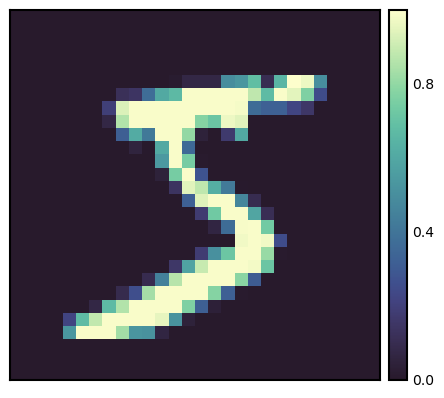

In [43]:
import seaborn_image as isns
isns.imgplot(x1.reshape(28,28))

In [44]:
iter_ = iter(train_dl)

In [45]:
state_dict = torch.load('model.pth')
state_dict.keys()
weights = []
weights.append(state_dict['linear_relu_stack.0.weight'].clone())
weights.append(state_dict['linear_relu_stack.2.weight'].clone())
bias = []
bias.append(state_dict['linear_relu_stack.0.bias'].clone())
bias.append(state_dict['linear_relu_stack.2.bias'].clone())

In [46]:
x1,y1 = next(iter_)
x1, y1 =x1.flatten(), y1.squeeze()
x1.shape, y1.shape
y1

tensor(5)

In [48]:
x1 = x1*255

In [49]:
a = forward(x1)
cross_entropy(softmax(a[-1]),y1)

tensor(25.9009)

In [80]:
for k in weights[0][1]:
    print(k)

tensor(-0.0003)
tensor(0.0192)
tensor(-0.0294)
tensor(-0.0263)
tensor(-0.0138)
tensor(0.0096)
tensor(-0.0007)
tensor(0.0283)
tensor(-0.0032)
tensor(0.0095)
tensor(-0.0108)
tensor(-0.0070)
tensor(-0.0341)
tensor(-0.0237)
tensor(-0.0147)
tensor(0.0013)
tensor(0.0141)
tensor(0.0214)
tensor(-0.0242)
tensor(-0.0156)
tensor(0.0130)
tensor(0.0297)
tensor(-0.0074)
tensor(0.0267)
tensor(-0.0058)
tensor(0.0038)
tensor(0.0323)
tensor(-0.0331)
tensor(-0.0225)
tensor(-0.0090)
tensor(-0.0139)
tensor(0.0309)
tensor(-0.0231)
tensor(-0.0164)
tensor(-0.0250)
tensor(-0.0334)
tensor(-0.0208)
tensor(0.0307)
tensor(0.0159)
tensor(0.0173)
tensor(0.0019)
tensor(-0.0183)
tensor(0.0060)
tensor(-0.0333)
tensor(-0.0258)
tensor(-0.0184)
tensor(0.0225)
tensor(0.0209)
tensor(-0.0158)
tensor(-0.0013)
tensor(0.0228)
tensor(0.0355)
tensor(0.0142)
tensor(0.0048)
tensor(0.0239)
tensor(-0.0210)
tensor(0.0067)
tensor(-0.0277)
tensor(-0.0248)
tensor(-0.0184)
tensor(0.0162)
tensor(0.0144)
tensor(-0.0212)
tensor(0.0108)
tenso

In [74]:
sum = 0
for i in range(len(x1)):
    sum += x1[i]*weights[0][1][i]
    print(sum, x1[i], weights[0][1][i])

tensor(0.) tensor(0.) tensor(-0.0198)
tensor(0.) tensor(0.) tensor(-0.0150)
tensor(0.) tensor(0.) tensor(-0.0104)
tensor(0.) tensor(0.) tensor(-0.0348)
tensor(0.) tensor(0.) tensor(0.0019)
tensor(0.) tensor(0.) tensor(0.0063)
tensor(0.) tensor(0.) tensor(-3.0238e-05)
tensor(0.) tensor(0.) tensor(0.0115)
tensor(0.) tensor(0.) tensor(0.0339)
tensor(0.) tensor(0.) tensor(0.0095)
tensor(0.) tensor(0.) tensor(-0.0131)
tensor(0.) tensor(0.) tensor(-0.0147)
tensor(0.) tensor(0.) tensor(-0.0229)
tensor(0.) tensor(0.) tensor(-0.0248)
tensor(0.) tensor(0.) tensor(-0.0058)
tensor(0.) tensor(0.) tensor(-0.0063)
tensor(0.) tensor(0.) tensor(0.0159)
tensor(0.) tensor(0.) tensor(-0.0153)
tensor(0.) tensor(0.) tensor(0.0285)
tensor(0.) tensor(0.) tensor(-0.0251)
tensor(0.) tensor(0.) tensor(0.0001)
tensor(0.) tensor(0.) tensor(0.0321)
tensor(0.) tensor(0.) tensor(0.0355)
tensor(0.) tensor(0.) tensor(-0.0207)
tensor(0.) tensor(0.) tensor(0.0064)
tensor(0.) tensor(0.) tensor(0.0042)
tensor(0.) tensor(0.

In [60]:
x1@weights[0].T

tensor([  27.6099,   32.1128,  -50.6857,  -10.6418,   22.0753,  -34.9349,
        -113.4836,   20.4312,   54.3101,  -60.3901,   24.8315,    3.8750,
         -66.7918,  -25.1650,   43.1287,   54.5816,    3.3011,  -17.7552])

In [50]:
x1

tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

In [51]:
def fullprint(*args, **kwargs):
  from pprint import pprint
  import numpy
  opt = numpy.get_printoptions()
  numpy.set_printoptions(threshold=numpy.inf)
  pprint(*args, **kwargs)
  numpy.set_printoptions(**opt)

In [53]:

import sys
fullprint(np.array(x1))

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [54]:
bias[0]

tensor([ 0.0112,  0.0016,  0.0017, -0.0255, -0.0138, -0.0105, -0.0166, -0.0136,
         0.0042,  0.0343, -0.0148, -0.0309,  0.0098,  0.0320, -0.0351,  0.0314,
         0.0258,  0.0109])

In [55]:
fullprint(a[1])

tensor([27.6211, 32.1144,  0.0000,  0.0000, 22.0615,  0.0000,  0.0000, 20.4177,
        54.3143,  0.0000, 24.8167,  3.8441,  0.0000,  0.0000, 43.0936, 54.6130,
         3.3269,  0.0000])


In [56]:
fullprint(a[2])

tensor([ -1.2346,  -5.9150,  -7.3258,   8.3320,  14.6910,  -6.4584,  -0.4364,
         11.8747,  19.4332, -14.6356])


In [1341]:
backward(a,y1)

tensor(2.3730)

In [1342]:
bias[0]

tensor([ 0.0112,  0.0013,  0.0017, -0.0254, -0.0139, -0.0106, -0.0166, -0.0132,
         0.0040,  0.0343, -0.0148, -0.0309,  0.0098,  0.0320, -0.0349,  0.0310,
         0.0263,  0.0108])

In [1343]:
bias[1]

tensor([-0.1410, -0.0624, -0.0507, -0.2053, -0.0986, -0.1225,  0.0111,  0.2333,
         0.1426,  0.1192])

In [1336]:
weights[0]

tensor([[-0.0003,  0.0192, -0.0294,  ...,  0.0219,  0.0037,  0.0021],
        [-0.0198, -0.0150, -0.0104,  ..., -0.0203, -0.0060, -0.0299],
        [-0.0201,  0.0149, -0.0333,  ..., -0.0203,  0.0012,  0.0080],
        ...,
        [-0.0215,  0.0106,  0.0308,  ..., -0.0199,  0.0161, -0.0342],
        [ 0.0350, -0.0297, -0.0037,  ...,  0.0171,  0.0238, -0.0001],
        [ 0.0085,  0.0223, -0.0324,  ..., -0.0296,  0.0182, -0.0296]])

In [1344]:
weights[1][y1]

tensor([ 0.1390, -0.1493, -0.2147,  0.2143,  0.1171, -0.1545, -0.1654,  0.0632,
         0.1547,  0.2064,  0.0297,  0.1380,  0.0920,  0.0833, -0.1179, -0.1704,
         0.2290,  0.0490])

In [916]:
x1,y1 = next(iter(train_dl))
x1.shape, y1.shape

(torch.Size([1, 1, 28, 28]), torch.Size([1]))

In [921]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 18),
            nn.ReLU(),
            nn.Linear(18, 10),
            nn.Softmax()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
        
torch.manual_seed(0)
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load('model.pth'))
print(model)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
model(x1)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=18, bias=True)
    (1): ReLU()
    (2): Linear(in_features=18, out_features=10, bias=True)
    (3): Softmax(dim=None)
  )
)


tensor([[0.0865, 0.0919, 0.0930, 0.0835, 0.0954, 0.0857, 0.1006, 0.1327, 0.1245,
         0.1064]], grad_fn=<SoftmaxBackward0>)

### Test the full training 

In [817]:
x,y = next(iter(train_dataloader))
x,y = x.flatten(), y.squeeze()

In [1272]:
def train(dataloader):
    correct = 0
    size = len(dataloader.dataset)
    for i, (x,y) in enumerate(dataloader):
        x,y = x.flatten(), y.squeeze()
        a = forward(x)
        loss = cross_entropy(softmax(a[-1]),y)

        backward(a,y)

        correct += (a[-1].argmax() == y).type(torch.float).sum()

        # if i % 100 == 0:
        loss, current = loss.item(), (i+1)
        print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")
        if i > 2000:
            return True
        
    correct /= size
    print(f"Training Error: \n Accuracy: {(100*correct):>0.1f}%")

        

In [1273]:
def test(dataloader):
    correct = 0
    test_loss = 0
    for x,y in dataloader:
        x,y = x.flatten(), y.squeeze()
        a = forward(x)
        test_loss += cross_entropy(softmax(a[-1]),y)
        correct += (a[-1].argmax() == y).type(torch.float).sum()

    test_loss /= len(dataloader)
    correct /= len(dataloader.dataset)
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct

In [1274]:
state_dict = torch.load('model.pth')
state_dict.keys()
weights = []
weights.append(state_dict['linear_relu_stack.0.weight'].clone())
weights.append(state_dict['linear_relu_stack.2.weight'].clone())
bias = []
bias.append(state_dict['linear_relu_stack.0.bias'].clone())
bias.append(state_dict['linear_relu_stack.2.bias'].clone())

In [1275]:
train(train_dataloader)

loss: 2.457382 [    1/60000]
loss: 2.373045 [    2/60000]
loss: 2.397981 [    3/60000]
loss: 2.376602 [    4/60000]
loss: 2.280104 [    5/60000]
loss: 2.347051 [    6/60000]
loss: 2.386698 [    7/60000]
loss: 2.507777 [    8/60000]
loss: 2.379634 [    9/60000]
loss: 2.355851 [   10/60000]
loss: 2.437241 [   11/60000]
loss: 2.384903 [   12/60000]
loss: 2.462984 [   13/60000]
loss: 2.358255 [   14/60000]
loss: 2.352472 [   15/60000]
loss: 2.039407 [   16/60000]
loss: 2.390954 [   17/60000]
loss: 2.078932 [   18/60000]
loss: 2.301366 [   19/60000]
loss: 2.144966 [   20/60000]
loss: 2.441458 [   21/60000]
loss: 2.397276 [   22/60000]
loss: 2.190477 [   23/60000]
loss: 2.356754 [   24/60000]
loss: 2.463299 [   25/60000]
loss: 2.285216 [   26/60000]
loss: 2.384321 [   27/60000]
loss: 2.388861 [   28/60000]
loss: 2.317114 [   29/60000]
loss: 2.032908 [   30/60000]
loss: 2.382332 [   31/60000]
loss: 2.028679 [   32/60000]
loss: 2.347586 [   33/60000]
loss: 2.172549 [   34/60000]
loss: 2.464722

True

In [1276]:
test(test_dataloader)

Test Error: 
 Accuracy: 67.2%, Avg loss: 2.107958 



tensor(0.6720)

In [855]:
bias[-2]

tensor([ 0.0086,  0.0015,  0.0017, -0.0255, -0.0140, -0.0105, -0.0166,  0.0336,
         0.0040,  0.0343, -0.0148, -0.0309,  0.0098,  0.0320,  0.0282,  0.0313,
         0.0468,  0.0109])

In [553]:
(x,y) = train_dataloader.dataset[500]
x,y = x.flatten(), y

In [554]:
a = forward(x)
cross_entropy(a[-1],y)

tensor(3.3171)

## Claude code

In [1321]:
def numerical_gradients(f, x, eps=1e-5):
    """
    Compute numerical gradients of a function f at a point x.
    """
    x = x.detach().requires_grad_(True)
    grads = []
    for i in range(x.nelement()):
        ori_x = x.clone()
        ori_x.flatten()[i] += eps
        y_pos = f(ori_x)
        ori_x.flatten()[i] -= 2 * eps
        y_neg = f(ori_x)
        grads.append((y_pos - y_neg) / (2 * eps))
    return torch.stack(grads).view_as(x)

def compare_gradients(f, x, eps=1e-3):
    """
    Compare analytical and numerical gradients of a function f at a point x.
    """
    x = x.detach().requires_grad_(True)
    analytical_grad = torch.autograd.grad(f(x), x, create_graph=True)[0]
    numerical_grad = numerical_gradients(f, x, eps)
    diff = torch.abs(analytical_grad - numerical_grad)
    # return analytical_grad,numerical_grad
    return torch.allclose(analytical_grad, numerical_grad, atol=eps)

In [1322]:
def compute_loss(x, y):
    y_pred = softmax(forward(x)[-1])
    return cross_entropy(y_pred, y)

In [1323]:
iter_ = iter(train_dl)
state_dict = torch.load('model.pth')
state_dict.keys()

weights = []
weights.append(state_dict['linear_relu_stack.0.weight'].clone())
weights.append(state_dict['linear_relu_stack.2.weight'].clone())

bias = []
bias.append(state_dict['linear_relu_stack.0.bias'].clone())
bias.append(state_dict['linear_relu_stack.2.bias'].clone())

x1, y1 = next(iter_)
x1, y1 = x1.flatten(), y1.squeeze()

# Check gradients before the backward pass
# a1,n1 = compare_gradients(lambda x: compute_loss(x, y1), x1)
print("Gradient check before backward pass:", compare_gradients(lambda x: compute_loss(x, y1), x1))

a = forward(x1)
loss = cross_entropy(softmax(a[-1]), y1)
backward(a, y1)

# Check gradients after the backward pass
# a2,n2 = compare_gradients(lambda x: compute_loss(x, y1), x1)
print("Gradient check after backward pass:", compare_gradients(lambda x: compute_loss(x, y1), x1))

Gradient check before backward pass: True
Gradient check after backward pass: True


In [1324]:
a[-1]

tensor([-0.1448, -0.0842, -0.0713, -0.1799, -0.0463, -0.1540,  0.0068,  0.2833,
         0.2197,  0.0625])

In [1325]:
a2

tensor([-3.4099e-03, -5.8973e-03, -7.6170e-03,  9.3721e-03, -1.3587e-02,
         1.8532e-02,  1.4251e-02,  3.1801e-04,  3.0352e-03, -3.2623e-03,
        -1.5701e-04,  3.3171e-03,  1.7362e-03, -1.6741e-02, -1.0981e-02,
         8.7031e-03, -1.7773e-03, -1.4019e-02,  4.1619e-03, -1.4817e-02,
         1.1686e-02,  2.3578e-02,  5.8366e-03, -2.1297e-02,  1.2433e-02,
         6.0295e-03, -3.1840e-03,  1.0132e-02,  4.2972e-03,  1.6210e-03,
         1.0653e-02,  7.5712e-03, -5.2470e-03,  5.2288e-03, -1.8128e-03,
         1.1832e-02,  3.6505e-04, -7.4102e-03,  4.9205e-03, -2.8104e-03,
         2.3235e-03,  5.7258e-03,  5.6098e-03, -2.7119e-02,  3.5684e-03,
        -4.9104e-03, -2.0233e-02, -1.5040e-02,  1.9762e-03,  1.2869e-02,
        -1.3593e-02,  2.6663e-03,  8.3546e-04,  1.1420e-04, -2.2234e-03,
        -7.7329e-03,  1.3043e-02,  1.0374e-03, -3.6343e-03,  1.6006e-02,
        -4.2107e-03,  6.9430e-03,  3.9188e-03, -1.1052e-02, -1.0793e-02,
        -2.7822e-03,  6.6480e-03, -1.3865e-02, -6.4

In [1320]:
n1

tensor([-0.0035, -0.0058, -0.0076,  0.0093, -0.0137,  0.0186,  0.0142,  0.0004,
         0.0030, -0.0032, -0.0001,  0.0032,  0.0018, -0.0168, -0.0111,  0.0088,
        -0.0017, -0.0141,  0.0042, -0.0148,  0.0117,  0.0236,  0.0058, -0.0213,
         0.0125,  0.0061, -0.0031,  0.0103,  0.0042,  0.0015,  0.0107,  0.0077,
        -0.0052,  0.0051, -0.0018,  0.0119,  0.0004, -0.0074,  0.0050, -0.0029,
         0.0023,  0.0057,  0.0056, -0.0273,  0.0036, -0.0050, -0.0204, -0.0151,
         0.0020,  0.0130, -0.0136,  0.0026,  0.0007,  0.0001, -0.0023, -0.0077,
         0.0132,  0.0011, -0.0038,  0.0161, -0.0042,  0.0070,  0.0039, -0.0112,
        -0.0108, -0.0029,  0.0067, -0.0141, -0.0064, -0.0043,  0.0080, -0.0175,
         0.0083,  0.0017,  0.0002,  0.0097,  0.0079,  0.0033, -0.0154,  0.0113,
         0.0008, -0.0165, -0.0035,  0.0041,  0.0066,  0.0018,  0.0023, -0.0026,
        -0.0085, -0.0080, -0.0125, -0.0055, -0.0013,  0.0067,  0.0077, -0.0045,
        -0.0018, -0.0172, -0.0086,  0.00